# Calculate Sharpe Ratio

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'Sharpe_RUA.csv'
data = pd.read_csv(path)
data.head(n=10)

,Date,RUA Close,Risk-Free TNX
0,9/10/87,178.830002,9.42
1,9/11/87,181.339996,9.33
2,9/14/87,181.789993,9.34
3,9/15/87,179.270004,9.44
4,9/16/87,177.889999,9.52
5,9/17/87,177.839996,9.48
6,9/18/87,177.690002,9.38
7,9/21/87,175.479996,9.45
8,9/22/87,179.419998,9.37
9,9/23/87,180.520004,9.40


In [252]:
values = data['Risk-Free TNX'].values

for i in range(len(values)):
    if np.isnan(values[i]) == True:
        values[i] = values[i-1]

data['Risk-Free TNX'] = values

In [253]:
values = data['RUA Close'].values

for i in range(len(values)):
    if np.isnan(values[i]) == True:
        print(values[i-1])
        values[i] = values[i-1]

data['RUA Close'] = values

1418.060059
1449.160034
1538.77002
1573.310059
1656.439941
1660.609985
1650.26001
1665.25
1649.050049
1660.599976
1660.030029
1707.6700440000002
1704.27002
1714.660034
1725.52002
1734.709961


In [254]:
data.tail(n=10)

,Date,RUA Close,Risk-Free TNX
7967,4/23/19,1728.430054,2.570
7968,4/24/19,1725.520020,2.522
7969,4/25/19,1725.520020,2.534
7970,4/26/19,1732.430054,2.505
7971,4/29/19,1734.709961,2.536
7972,4/30/19,1734.709961,2.509
7973,5/1/19,1722.229980,2.511
7974,5/2/19,1719.630005,2.552
7975,5/3/19,1737.949951,2.531
7976,5/6/19,1731.209961,2.500


## 1. Calculate Return

Return is equal to $$\frac{Price_1}{Price_0} - 1$$

In [255]:
from datetime import date, datetime, timedelta

In [256]:
# Calculate RUA returns
values = data['RUA Close'].values
return_val1 = []

for i in range(1, data.shape[0]):
    return_val1.append((values[i] / values[i-1]) - 1)

In [257]:
data = data.iloc[1:len(data)]
data['RUA_Returns'] = return_val1

In [258]:
data.tail(n=10)

,Date,RUA Close,Risk-Free TNX,RUA_Returns
7967,4/23/19,1728.430054,2.570,0.009674
7968,4/24/19,1725.520020,2.522,-0.001684
7969,4/25/19,1725.520020,2.534,0.000000
7970,4/26/19,1732.430054,2.505,0.004005
7971,4/29/19,1734.709961,2.536,0.001316
7972,4/30/19,1734.709961,2.509,0.000000
7973,5/1/19,1722.229980,2.511,-0.007194
7974,5/2/19,1719.630005,2.552,-0.001510
7975,5/3/19,1737.949951,2.531,0.010653
7976,5/6/19,1731.209961,2.500,-0.003878


In [259]:
# Calculate mean MSFT return over 3 year period:

dates = [datetime.strptime(data['Date'].values[j], '%m/%d/%y') for j in range(len(data['Date'].values))]
data['Dates'] = dates

val_list = []

for i in range(data.shape[0]):

    date = dates[i]
    
    mindate = date - timedelta(days = 365 * 3)

    subset = pd.merge(data[data['Dates'] > mindate],data[data['Dates'] <= date], how='inner')
    
    val_list.append(np.mean(subset['RUA_Returns'].values) * 252)

data['Annual_Return_RUA'] = val_list

Calculate average return

In [260]:
data.head(n=10)

,Date,RUA Close,Risk-Free TNX,RUA_Returns,Dates,Annual_Return_RUA
1,9/11/87,181.339996,9.33,0.014036,1987-09-11,3.536982
2,9/14/87,181.789993,9.34,0.002482,1987-09-14,2.081161
3,9/15/87,179.270004,9.44,-0.013862,1987-09-15,0.223025
4,9/16/87,177.889999,9.52,-0.007698,1987-09-16,-0.317700
5,9/17/87,177.839996,9.48,-0.000281,1987-09-17,-0.268327
6,9/18/87,177.690002,9.38,-0.000843,1987-09-18,-0.259029
7,9/21/87,175.479996,9.45,-0.012437,1987-09-21,-0.669772
8,9/22/87,179.419998,9.37,0.022453,1987-09-22,0.121210
9,9/23/87,180.520004,9.40,0.006131,1987-09-23,0.279407
10,9/24/87,179.970001,9.51,-0.003047,1987-09-24,0.174688


## 2. Subtract CBOE 10-Year Bond Interest (Risk-Free)

In [261]:
data['Numerator'] = data['Annual_Return_RUA'] - (data['Risk-Free TNX'] / 100)

data.tail(n=10)

,Date,RUA Close,Risk-Free TNX,RUA_Returns,Dates,Annual_Return_RUA,Numerator
7967,4/23/19,1728.430054,2.570,0.009674,2019-04-23,0.120420,0.094720
7968,4/24/19,1725.520020,2.522,-0.001684,2019-04-24,0.119699,0.094479
7969,4/25/19,1725.520020,2.534,0.000000,2019-04-25,0.120538,0.095198
7970,4/26/19,1732.430054,2.505,0.004005,2019-04-26,0.120865,0.095815
7971,4/29/19,1734.709961,2.536,0.001316,2019-04-29,0.125992,0.100632
7972,4/30/19,1734.709961,2.509,0.000000,2019-04-30,0.125825,0.100735
7973,5/1/19,1722.229980,2.511,-0.007194,2019-05-01,0.123257,0.098147
7974,5/2/19,1719.630005,2.552,-0.001510,2019-05-02,0.120129,0.094609
7975,5/3/19,1737.949951,2.531,0.010653,2019-05-03,0.126985,0.101675
7976,5/6/19,1731.209961,2.500,-0.003878,2019-05-06,0.127191,0.102191


In [263]:
# Calculate std dev of return over 3 year period:

dates = [datetime.strptime(data['Date'].values[j], '%m/%d/%y') for j in range(len(data['Date'].values))]
data['Dates'] = dates

val_list = []

for i in range(data.shape[0]):

    date = dates[i]
    
    mindate = date - timedelta(days = 365 * 3)

    subset = pd.merge(data[data['Dates'] > mindate],data[data['Dates'] <= date], how='inner')
    
    val_list.append(np.std(subset['Numerator'].values * np.sqrt(252)))

data['Std_RUA'] = val_list

In [264]:
data.tail(n=10)

,Date,RUA Close,Risk-Free TNX,RUA_Returns,Dates,Annual_Return_RUA,Numerator,Std_RUA
7967,4/23/19,1728.430054,2.570,0.009674,2019-04-23,0.120420,0.094720,0.257165
7968,4/24/19,1725.520020,2.522,-0.001684,2019-04-24,0.119699,0.094479,0.257386
7969,4/25/19,1725.520020,2.534,0.000000,2019-04-25,0.120538,0.095198,0.257734
7970,4/26/19,1732.430054,2.505,0.004005,2019-04-26,0.120865,0.095815,0.258094
7971,4/29/19,1734.709961,2.536,0.001316,2019-04-29,0.125992,0.100632,0.258918
7972,4/30/19,1734.709961,2.509,0.000000,2019-04-30,0.125825,0.100735,0.259356
7973,5/1/19,1722.229980,2.511,-0.007194,2019-05-01,0.123257,0.098147,0.259693
7974,5/2/19,1719.630005,2.552,-0.001510,2019-05-02,0.120129,0.094609,0.260074
7975,5/3/19,1737.949951,2.531,0.010653,2019-05-03,0.126985,0.101675,0.260713
7976,5/6/19,1731.209961,2.500,-0.003878,2019-05-06,0.127191,0.102191,0.261700


In [265]:
data['Ratio'] = data['Numerator'] / data['Std_RUA']

In [267]:
data.tail(n=10)

,Date,RUA Close,Risk-Free TNX,RUA_Returns,Dates,Annual_Return_RUA,Numerator,Std_RUA,Ratio
7967,4/23/19,1728.430054,2.570,0.009674,2019-04-23,0.120420,0.094720,0.257165,0.368326
7968,4/24/19,1725.520020,2.522,-0.001684,2019-04-24,0.119699,0.094479,0.257386,0.367071
7969,4/25/19,1725.520020,2.534,0.000000,2019-04-25,0.120538,0.095198,0.257734,0.369366
7970,4/26/19,1732.430054,2.505,0.004005,2019-04-26,0.120865,0.095815,0.258094,0.371242
7971,4/29/19,1734.709961,2.536,0.001316,2019-04-29,0.125992,0.100632,0.258918,0.388663
7972,4/30/19,1734.709961,2.509,0.000000,2019-04-30,0.125825,0.100735,0.259356,0.388403
7973,5/1/19,1722.229980,2.511,-0.007194,2019-05-01,0.123257,0.098147,0.259693,0.377935
7974,5/2/19,1719.630005,2.552,-0.001510,2019-05-02,0.120129,0.094609,0.260074,0.363778
7975,5/3/19,1737.949951,2.531,0.010653,2019-05-03,0.126985,0.101675,0.260713,0.389988
7976,5/6/19,1731.209961,2.500,-0.003878,2019-05-06,0.127191,0.102191,0.261700,0.390490


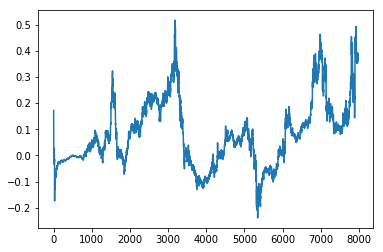

In [271]:
import matplotlib.pyplot as plt

plt.plot(data['Ratio'])
plt.show()

In [275]:
mindate = datetime.strptime('1/1/91', '%m/%d/%y')
subset = data[data['Dates'] > mindate]

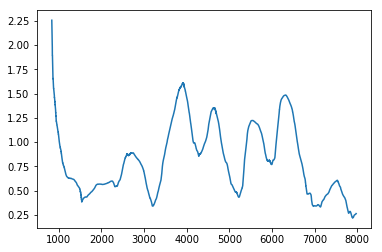

In [277]:
plt.plot(subset['Std_RUA'])
plt.show()

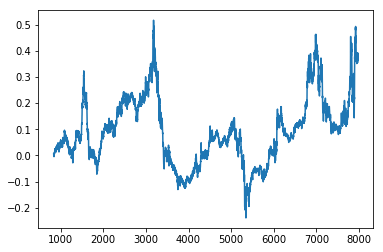

In [278]:
plt.plot(subset['Ratio'])
plt.show()

In [279]:
# The ratio gets lower when the standard deviation peaks, which makes sense. The standard deviation trends are very predictable it seems

In [280]:
name = 'Sharpe_RUA_complete.csv'

subset.to_csv(name)

In [286]:
# smoothed at lambda = 5

In [281]:
df = pd.read_csv(name)

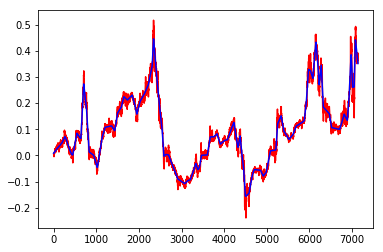

In [285]:
plt.plot(df['Ratio'], color='red')
plt.plot(df['Ratio_smoothed'],color='blue')

look one month ahead, just in general the outcome for that month